In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.model_selection as cv
import sklearn.feature_selection as feat
import sklearn.preprocessing as Pre
import sklearn.tree as Tree
import sklearn.ensemble as Ens
import sklearn.metrics as m

# Meta-learning methods

In [2]:
data = pd.read_csv('train.csv', sep=',', na_values="NA")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,Fence,MiscVal,SaleType,SaleCondition,SalePrice,MasVnr,SecondFloor,Baths,Porch,Pool
0,0.000000,F,RL,0.249485,1.0,Lvl,Inside,CollgCr,Norm,1Fam,...,0.0,0.0,WD,Normal,Level3,1.0,1.0,0.6,True,0.0
1,0.000685,A,RL,0.289612,1.0,Lvl,FR,Veenker,Feedr,1Fam,...,0.0,0.0,WD,Normal,Level2,0.0,0.0,0.4,True,0.0
2,0.001371,F,RL,0.347186,0.0,Lvl,Inside,CollgCr,Norm,1Fam,...,0.0,0.0,WD,Normal,Level3,1.0,1.0,0.6,True,0.0
3,0.002056,G,RL,0.287868,0.0,Lvl,Corner,Crawfor,Norm,1Fam,...,0.0,0.0,WD,Abnorml,Level2,0.0,1.0,0.2,True,0.0
4,0.002742,F,RL,0.452214,0.0,Lvl,FR,NoRidge,Norm,1Fam,...,0.0,0.0,WD,Normal,Level3,1.0,1.0,0.6,True,0.0


In [4]:
kfold = cv.StratifiedKFold(n_splits=10, random_state=1) 

In [5]:
X = data.drop(columns='SalePrice')
Y = data.loc[:,'SalePrice']

le = Pre.LabelEncoder()
le.fit(Y)
Y = le.fit_transform(Y)
i = 0
for t in X.dtypes:
    if t == object or t == bool:
        le.fit(X.iloc[:,i])
        X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    i += 1

X_train, X_test, y_train, y_test = cv.train_test_split(X, Y, test_size=.3, random_state=1)

## Bagging

In [25]:
bg = Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(), random_state=0).fit(X_train, y_train)
bg.score(X_test,y_test)

0.8078703703703703

In [26]:
cvs = cv.cross_val_score(bg,X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.8140495049504951

In [27]:
pred = cv.cross_val_predict(bg, X=X_test, y=y_test, cv=kfold)  

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[[ 17  20   0   0   0]
 [ 11 253  14   0   0]
 [  0  27  51   6   0]
 [  0   1  14  13   1]
 [  0   0   0   4   0]]
0.7731481481481481
              precision    recall  f1-score   support

           0       0.61      0.46      0.52        37
           1       0.84      0.91      0.87       278
           2       0.65      0.61      0.63        84
           3       0.57      0.45      0.50        29
           4       0.00      0.00      0.00         4

    accuracy                           0.77       432
   macro avg       0.53      0.48      0.50       432
weighted avg       0.76      0.77      0.76       432



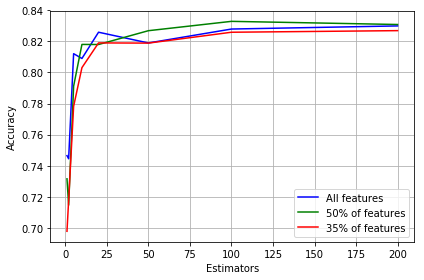

In [28]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),n_estimators=nest), X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),n_estimators=nest,max_features=0.5), X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Default')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='50% of features')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% of features')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

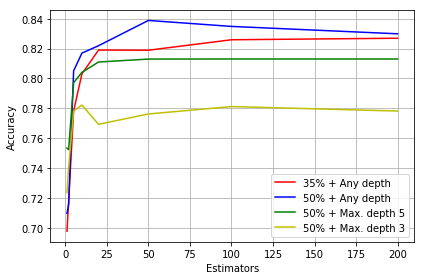

In [29]:
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% + Any depth')

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),n_estimators=nest,max_features=0.5), X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=3),n_estimators=nest,max_features=0.5), X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=5),n_estimators=nest,max_features=0.5), X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())


    
plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='50% + Any depth')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='50% + Max. depth 5')
plt.plot([1,2,5,10,20,50,100,200],lb2,'y',label='50% + Max. depth 3')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

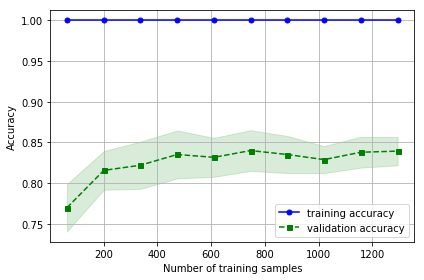

In [30]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),
                                                                  n_estimators=100,
                                                                  max_features=0.5),
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## Random Forests

In [31]:
rfc = Ens.RandomForestClassifier().fit(X_train, y_train)
rfc.score(X_test,y_test)

0.8310185185185185

In [32]:
cvs = cv.cross_val_score(rfc,X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.826930693069307

In [33]:
pred = cv.cross_val_predict(rfc, X=X_test, y=y_test, cv=kfold)  

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[[ 12  25   0   0   0]
 [  6 267   5   0   0]
 [  0  26  56   2   0]
 [  0   0  15  14   0]
 [  0   0   0   4   0]]
0.8078703703703703
              precision    recall  f1-score   support

           0       0.67      0.32      0.44        37
           1       0.84      0.96      0.90       278
           2       0.74      0.67      0.70        84
           3       0.70      0.48      0.57        29
           4       0.00      0.00      0.00         4

    accuracy                           0.81       432
   macro avg       0.59      0.49      0.52       432
weighted avg       0.79      0.81      0.79       432



c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


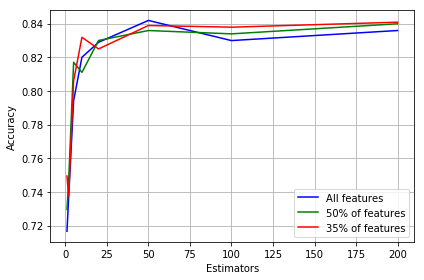

In [44]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest), X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest, max_features=0.35), X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest, max_features=0.5), X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Default')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='50% of features')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% of features')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

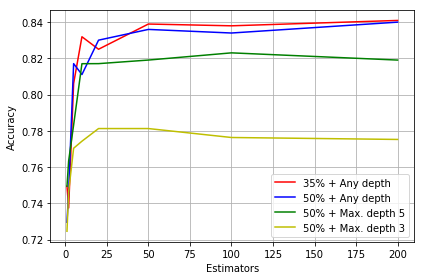

In [46]:
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% + Any depth')
plt.plot([1,2,5,10,20,50,100,200],lb3,'b',label='50% + Any depth')

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest,
                                                           max_features=0.5,
                                                           max_depth=3),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb4=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest,
                                                           max_features=0.5,
                                                           max_depth=5),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb4.append(scores.mean())
    
plt.plot([1,2,5,10,20,50,100,200],lb4,'g',label='50% + Max. depth 5')
plt.plot([1,2,5,10,20,50,100,200],lb,'y',label='50% + Max. depth 3')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

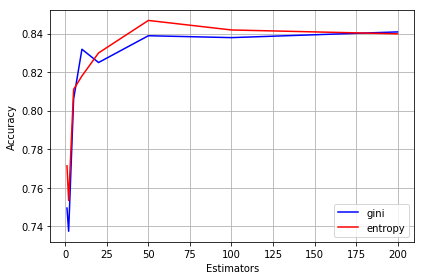

In [47]:
lb=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest,
                                                           criterion='entropy',
                                                           max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())
    
plt.plot([1,2,5,10,20,50,100,200],lb2,'b',label='gini')
plt.plot([1,2,5,10,20,50,100,200],lb,'r',label='entropy')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

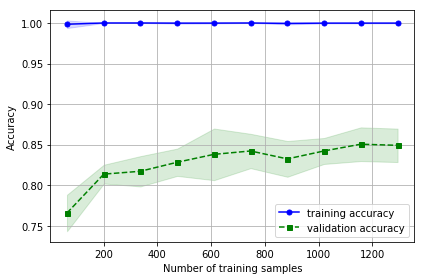

In [52]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(Ens.RandomForestClassifier(n_estimators=50,
                                                           criterion='entropy',
                                                           max_features=0.35),
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

In [55]:
rfc = Ens.RandomForestClassifier(n_estimators=50,
                                 criterion='entropy',
                                 max_features=0.35)
rfc = rfc.fit(X, Y)
print(rfc.feature_importances_)  

[2.49282277e-02 1.11096489e-02 3.96753850e-03 4.81877295e-02
 3.58437319e-03 3.55207304e-03 3.87965558e-03 2.08904253e-02
 3.01790541e-03 3.50518010e-03 5.01178262e-03 1.99652399e-01
 3.99105746e-02 3.17041864e-03 5.40508525e-04 1.03722438e-02
 4.47745004e-02 5.53419882e-03 2.52735898e-02 2.82629721e-03
 9.68616179e-03 1.10793865e-01 6.82630128e-03 1.53882991e-02
 1.67102143e-01 8.99545571e-03 1.93767012e-03 3.27824737e-02
 1.80960083e-02 3.05405199e-03 5.98557181e-03 6.05820318e-03
 6.40551388e-03 7.92279616e-03 7.10877987e-02 5.94285053e-03
 3.61697445e-03 2.69781126e-03 1.57550419e-03 1.11523101e-03
 4.05581522e-03 8.58724985e-03 3.13613672e-03 3.73527617e-03
 2.74796746e-02 2.13504740e-03 1.10844791e-04]


In [63]:
model = feat.SelectFromModel(rfc, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cv.cross_val_score(rfc, X=X, y=Y, cv=kfold, scoring='accuracy')))
print(np.mean(cv.cross_val_score(rfc, X=X_new, y=Y, cv=kfold, scoring='accuracy')))

(1438, 4)
0.8463480963480963
0.8081439393939395


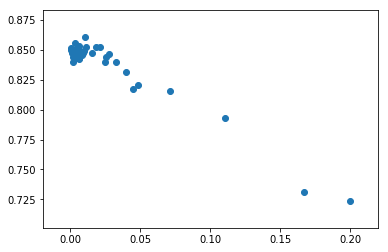

Best threshold:  0.010372243815325186


In [67]:
thresholds=rfc.feature_importances_

l=[]
for threshold in thresholds:
    model = feat.SelectFromModel(rfc, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    acc = np.mean(cv.cross_val_score(rfc, X=X_new, y=Y, cv=kfold, scoring='accuracy'))
    l.append(acc)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [70]:
model = feat.SelectFromModel(rfc, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)

In [71]:
X_train, X_test, y_train, y_test = cv.train_test_split(X_new, Y, test_size=.3, random_state=1)

In [74]:
rfc = Ens.RandomForestClassifier(n_estimators=50,
                                 criterion='entropy',
                                 max_features=0.35).fit(X_train, y_train)
rfc.score(X_test,y_test)

0.8310185185185185

## Extra Trees


In [75]:
X = data.drop(columns='SalePrice')
Y = data.loc[:,'SalePrice']

le = Pre.LabelEncoder()
le.fit(Y)
Y = le.fit_transform(Y)
i = 0
for t in X.dtypes:
    if t == object or t == bool:
        le.fit(X.iloc[:,i])
        X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    i += 1

X_train, X_test, y_train, y_test = cv.train_test_split(X, Y, test_size=.3, random_state=1)

In [76]:
etc = Ens.ExtraTreesClassifier().fit(X_train, y_train)
etc.score(X_test,y_test)

0.8194444444444444

In [77]:
cvs = cv.cross_val_score(etc,X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.8269900990099011

In [78]:
pred = cv.cross_val_predict(etc, X=X_test, y=y_test, cv=kfold)  

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[[ 12  25   0   0   0]
 [  7 263   8   0   0]
 [  0  25  56   3   0]
 [  0   1  12  16   0]
 [  0   0   0   3   1]]
0.8055555555555556
              precision    recall  f1-score   support

           0       0.63      0.32      0.43        37
           1       0.84      0.95      0.89       278
           2       0.74      0.67      0.70        84
           3       0.73      0.55      0.63        29
           4       1.00      0.25      0.40         4

    accuracy                           0.81       432
   macro avg       0.79      0.55      0.61       432
weighted avg       0.79      0.81      0.79       432



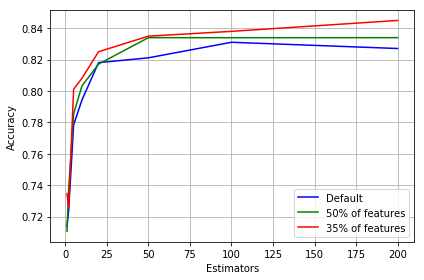

In [79]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest,
                                                         max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest,
                                                           max_features=0.5),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Default')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='50% of features')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% of features')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

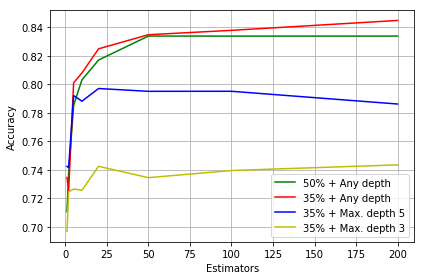

In [82]:
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='50% + Any depth')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% + Any depth')

lb=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest,
                                                         max_depth=3,
                                                         max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb4=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest,
                                                         max_depth=5,
                                                         max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb4.append(scores.mean())

    
plt.plot([1,2,5,10,20,50,100,200],lb4,'b',label='35% + Max. depth 5')
plt.plot([1,2,5,10,20,50,100,200],lb,'y',label='35% + Max. depth 3')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

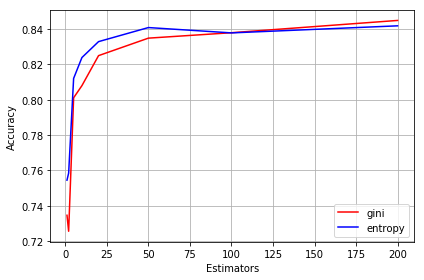

In [83]:
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='gini')
lb5=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest,
                                                           criterion='entropy',
                                                           max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb5.append(scores.mean())
    
plt.plot([1,2,5,10,20,50,100,200],lb5,'b',label='entropy')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

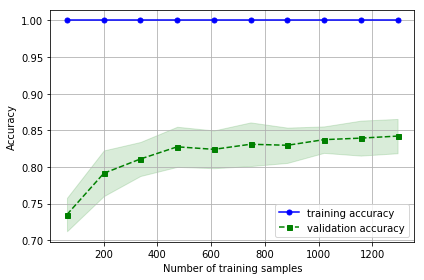

In [84]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=Ens.ExtraTreesClassifier(n_estimators=nest,
                                                                     max_features=0.35),
                                  X=X,
                                  y=Y,
                                  train_sizes=np.linspace(0.05, 1.0, 10),
                                  cv=10,
                                  n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## AdaBoost

In [107]:
adb = Ens.AdaBoostClassifier().fit(X_train, y_train)
adb.score(X_test,y_test)


0.6273148148148148

In [108]:
adb = Ens.AdaBoostClassifier()
cvs = cv.cross_val_score(adb,X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.666039603960396

In [109]:
pred = cv.cross_val_predict(adb, X=X_test, y=y_test, cv=kfold)  

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[[  6  30   1   0   0]
 [ 18 205  55   0   0]
 [  0  29  54   1   0]
 [  0   2  23   2   2]
 [  0   0   2   1   1]]
0.6203703703703703
              precision    recall  f1-score   support

           0       0.25      0.16      0.20        37
           1       0.77      0.74      0.75       278
           2       0.40      0.64      0.49        84
           3       0.50      0.07      0.12        29
           4       0.33      0.25      0.29         4

    accuracy                           0.62       432
   macro avg       0.45      0.37      0.37       432
weighted avg       0.63      0.62      0.61       432



In [110]:
adb = Ens.AdaBoostClassifier(base_estimator=Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=1),
                                                             random_state=0)).fit(X_train, y_train)
adb.score(X_test,y_test)

0.7175925925925926

In [113]:
adb = Ens.AdaBoostClassifier(base_estimator=Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=1),
                                                             random_state=0))

cvs = cv.cross_val_score(adb,X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.7432673267326733

In [114]:
pred = cv.cross_val_predict(adb, X=X_test, y=y_test, cv=kfold)  

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[[  0  36   1   0   0]
 [  0 227  51   0   0]
 [  0   9  71   4   0]
 [  0   0  14  14   1]
 [  0   0   0   4   0]]
0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.83      0.82      0.83       278
           2       0.52      0.85      0.64        84
           3       0.64      0.48      0.55        29
           4       0.00      0.00      0.00         4

    accuracy                           0.72       432
   macro avg       0.40      0.43      0.40       432
weighted avg       0.68      0.72      0.69       432



c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
adb = Ens.AdaBoostClassifier(base_estimator=Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),
                                                             random_state=0)).fit(X_train, y_train)
adb.score(X_test,y_test)

0.8240740740740741

In [119]:
adb = Ens.AdaBoostClassifier(Ens.RandomForestClassifier()).fit(X_train, y_train)
adb.score(X_test,y_test)

0.8287037037037037

In [120]:
cvs = cv.cross_val_score(adb,X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.8349009900990099

In [122]:
pred = cv.cross_val_predict(adb, X=X_test, y=y_test, cv=kfold)  

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[[ 13  24   0   0   0]
 [  4 267   7   0   0]
 [  0  24  59   1   0]
 [  0   0  14  14   1]
 [  0   0   0   4   0]]
0.8171296296296297
              precision    recall  f1-score   support

           0       0.76      0.35      0.48        37
           1       0.85      0.96      0.90       278
           2       0.74      0.70      0.72        84
           3       0.74      0.48      0.58        29
           4       0.00      0.00      0.00         4

    accuracy                           0.82       432
   macro avg       0.62      0.50      0.54       432
weighted avg       0.80      0.82      0.80       432



In [123]:
adb = Ens.AdaBoostClassifier(Ens.ExtraTreesClassifier()).fit(X_train, y_train)
adb.score(X_test,y_test)

0.8078703703703703

In [126]:
adb = Ens.AdaBoostClassifier(Ens.ExtraTreesClassifier())

cvs = cv.cross_val_score(adb,X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.8120396039603961

In [127]:
pred = cv.cross_val_predict(adb, X=X_test, y=y_test, cv=kfold)  

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[[ 12  25   0   0   0]
 [  6 265   7   0   0]
 [  0  24  57   3   0]
 [  0   0  12  17   0]
 [  0   0   0   3   1]]
0.8148148148148148
              precision    recall  f1-score   support

           0       0.67      0.32      0.44        37
           1       0.84      0.95      0.90       278
           2       0.75      0.68      0.71        84
           3       0.74      0.59      0.65        29
           4       1.00      0.25      0.40         4

    accuracy                           0.81       432
   macro avg       0.80      0.56      0.62       432
weighted avg       0.80      0.81      0.80       432



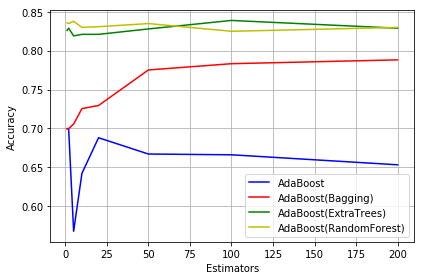

In [139]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.AdaBoostClassifier(n_estimators=nest),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.AdaBoostClassifier(n_estimators=nest,
                                                       base_estimator=Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=1),
                                                                                            random_state=0)),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.AdaBoostClassifier(n_estimators=nest,
                                                       base_estimator=Ens.ExtraTreesClassifier()),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

lb4=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.AdaBoostClassifier(n_estimators=nest,
                                                       base_estimator=Ens.RandomForestClassifier()),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb4.append(scores.mean())
    
    
    
plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='AdaBoost')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='AdaBoost(Bagging)')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='AdaBoost(ExtraTrees)')
plt.plot([1,2,5,10,20,50,100,200],lb4,'y',label='AdaBoost(RandomForest)')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

nestab = [1,2,5,10,20,50,100,200][np.argmax(lb)]
nestabrf = [1,2,5,10,20,50,100,200][np.argmax(lb4)]

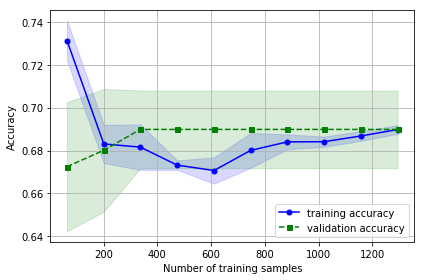

In [140]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=Ens.AdaBoostClassifier(n_estimators=nestab),
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

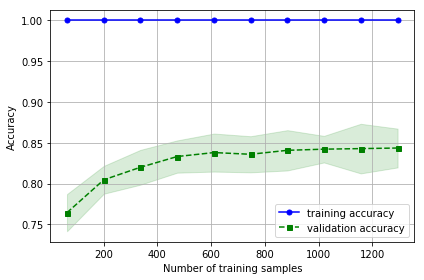

In [141]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=Ens.AdaBoostClassifier(n_estimators=nestabrf,
                                                       base_estimator=Ens.RandomForestClassifier()),
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## Gradient Tree Boosting

In [142]:
gbc = Ens.GradientBoostingClassifier().fit(X_train, y_train)
gbc.score(X_test,y_test)

0.8240740740740741

In [143]:
cvs = cv.cross_val_score(gbc,X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.8408415841584158

In [144]:
pred = cv.cross_val_predict(gbc, X=X_test, y=y_test, cv=kfold)  

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

c:\users\adris\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[[ 18  19   0   0   0]
 [  7 261  10   0   0]
 [  1  14  62   7   0]
 [  0   2   9  16   2]
 [  0   0   0   2   2]]
0.8310185185185185
              precision    recall  f1-score   support

           0       0.69      0.49      0.57        37
           1       0.88      0.94      0.91       278
           2       0.77      0.74      0.75        84
           3       0.64      0.55      0.59        29
           4       0.50      0.50      0.50         4

    accuracy                           0.83       432
   macro avg       0.70      0.64      0.66       432
weighted avg       0.82      0.83      0.82       432



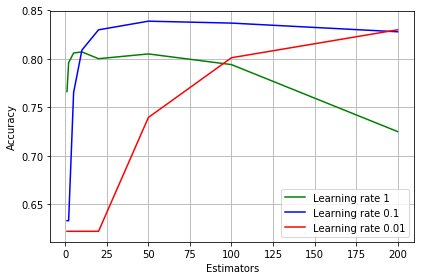

In [145]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest), X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.01), X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=1), X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='Learning rate 1')
plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Learning rate 0.1')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='Learning rate 0.01')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

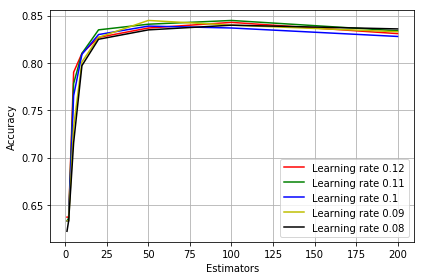

In [146]:
lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.09), X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb4=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.08), X_train, y_train, cv=kfold, scoring='accuracy')
    lb4.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.11), X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

lb5=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.12), X_train, y_train, cv=kfold, scoring='accuracy')
    lb5.append(scores.mean())

scgt = lb
    
plt.plot([1,2,5,10,20,50,100,200],lb5,'r',label='Learning rate 0.12')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='Learning rate 0.11')
plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Learning rate 0.1')
plt.plot([1,2,5,10,20,50,100,200],lb2,'y',label='Learning rate 0.09')
plt.plot([1,2,5,10,20,50,100,200],lb4,'black',label='Learning rate 0.08')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

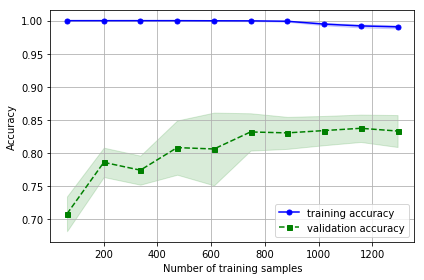

In [147]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=Ens.GradientBoostingClassifier(n_estimators=100),
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## Voting scheme

In [10]:
#import sklearn.neighbors as N

#knc = N.KNeighborsClassifier()
#sorted(N.VALID_METRICS['brute'])

from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=50

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, Y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, Y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Best Params fo Knn= {'n_neighbors': 17, 'weights': 'distance'} Accuracy= 0.7246175243393602


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.317 [Naive Bayes]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.726 [Knn (3)]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.779 [Dec. Tree]


In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, Y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.749 [Majority Voting]


In [14]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,5,10])
scores = cross_val_score(eclf, X, Y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.787 [Weighted Voting]
